## Import Dependencies

In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os
import imghdr

## Import CSV Dataset

In [11]:
dataset = pd.read_csv('./data/Brain Tumor.csv')

In [12]:
classnames = ['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity', 'Correlation', 'Coarsness', 'PSNR', 'SSIM', 'MSE', 'DC']

In [13]:
dataset.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


## Import Brain Scan Images

In [14]:
all_images_dir = './data/Brain Tumor/Brain Tumor/'

In [15]:
os.listdir(all_images_dir)

['Image1.jpg',
 'Image10.jpg',
 'Image100.jpg',
 'Image1000.jpg',
 'Image1001.jpg',
 'Image1002.jpg',
 'Image1003.jpg',
 'Image1004.jpg',
 'Image1005.jpg',
 'Image1006.jpg',
 'Image1007.jpg',
 'Image1008.jpg',
 'Image1009.jpg',
 'Image101.jpg',
 'Image1010.jpg',
 'Image1011.jpg',
 'Image1012.jpg',
 'Image1013.jpg',
 'Image1014.jpg',
 'Image1015.jpg',
 'Image1016.jpg',
 'Image1017.jpg',
 'Image1018.jpg',
 'Image1019.jpg',
 'Image102.jpg',
 'Image1020.jpg',
 'Image1021.jpg',
 'Image1022.jpg',
 'Image1023.jpg',
 'Image1024.jpg',
 'Image1025.jpg',
 'Image1026.jpg',
 'Image1027.jpg',
 'Image1028.jpg',
 'Image1029.jpg',
 'Image103.jpg',
 'Image1030.jpg',
 'Image1031.jpg',
 'Image1032.jpg',
 'Image1033.jpg',
 'Image1034.jpg',
 'Image1035.jpg',
 'Image1036.jpg',
 'Image1037.jpg',
 'Image1038.jpg',
 'Image1039.jpg',
 'Image104.jpg',
 'Image1040.jpg',
 'Image1041.jpg',
 'Image1042.jpg',
 'Image1043.jpg',
 'Image1044.jpg',
 'Image1045.jpg',
 'Image1046.jpg',
 'Image1047.jpg',
 'Image1048.jpg',
 '

In [16]:
example_scan = cv2.imread(os.path.join(all_images_dir, 'Image3.jpg'))

In [17]:
example_scan.shape

(240, 240, 3)

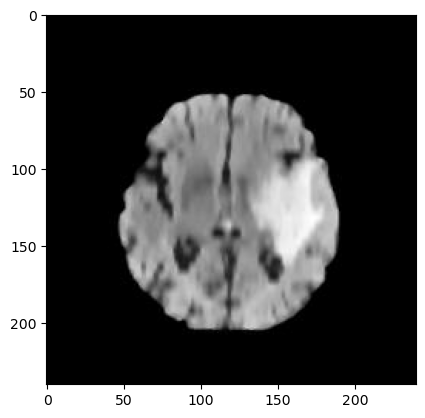

In [18]:
plt.imshow(example_scan)

## Load Data

In [19]:
import shutil

In [26]:
training_images_dir = './data/Brain Tumor/training'

In [25]:
image_dataset = tf.keras.utils.image_dataset_from_directory(training_images_dir)

Found 3762 files belonging to 2 classes.


In [28]:
image_dataset_iterator = image_dataset.as_numpy_iterator()

In [32]:
images_and_class = dataset[['Image', 'Class']]
images_and_class.head()

,Image,Class
0,Image1,0
1,Image2,0
2,Image3,1
3,Image4,1
4,Image5,0


In [33]:
positive_images_names_with_classes = images_and_class[images_and_class['Class'] == 1]

In [34]:
negative_images_names_with_classes = images_and_class[images_and_class['Class'] == 0]

In [35]:
positive_images_names = positive_images_names_with_classes.pop('Image')

In [36]:
negative_images_names = negative_images_names_with_classes.pop('Image')

### Move negative and positive images to respective folders

#### Move positive images

In [100]:
positive_image_dir = './data/Brain Tumor/training/positive'
for positive_image in positive_images_names:
    positive_image_source_file = all_images_dir + positive_image + '.jpg' 
    shutil.copy(positive_image_source_file, positive_image_dir)
    print(positive_image_source_file + " copied to: " + positive_image_dir)

./data/Brain Tumor/Brain Tumor/Image3.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image4.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image10.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image11.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image12.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image13.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image16.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image17.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image26.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image32.jpg copied to: ./data/Brain Tumor/training/positive
./data/Brain Tumor/Brain Tumor/Image33.jpg copied to: ./data/Brain Tumor/training/positive
.

#### Move negative images

In [101]:
negative_image_dir = './data/Brain Tumor/training/negative'
for negative_image in negative_images_names:
    negative_image_source_file = all_images_dir + negative_image + '.jpg' 
    shutil.copy(negative_image_source_file, negative_image_dir)
    print(negative_image_source_file + " copied to: " + negative_image_dir)

./data/Brain Tumor/Brain Tumor/Image1.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image2.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image5.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image6.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image7.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image8.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image9.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image14.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image15.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image18.jpg copied to: ./data/Brain Tumor/training/negative
./data/Brain Tumor/Brain Tumor/Image19.jpg copied to: ./data/Brain Tumor/training/negative
./data

### Create Image Dataset

In [37]:
dataset = tf.keras.utils.image_dataset_from_directory('./data/Brain Tumor/training/')

Found 3762 files belonging to 2 classes.


In [38]:
data_iterator = dataset.as_numpy_iterator()

In [39]:
batch = data_iterator.next()

### Preprocess data

In [40]:
data = dataset.map(lambda x, y: (x/255, y))

In [41]:
scaled_iterator = data.as_numpy_iterator()

In [42]:
batch = scaled_iterator.next()

In [43]:
batch[0].max()

0.99994254

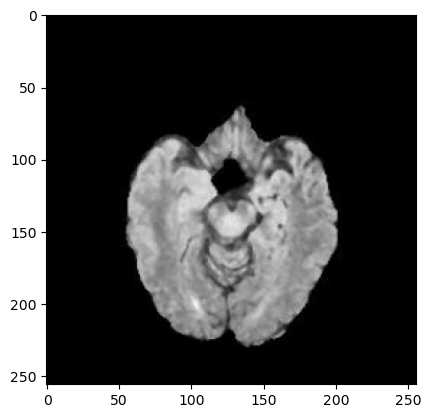

In [44]:
plt.imshow(batch[0][0])

In [45]:
len(data)

118

In [46]:
train_size = int(len(data)*.7)
validation_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [47]:
train = data.take(train_size)
val = data.skip(train_size).take(validation_size)
test = data.skip(train_size+validation_size).take(test_size)

# Neural Network

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [49]:
model = Sequential()

In [50]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\mikey\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [51]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Training

In [53]:
logdir = 'logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [55]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.7517 - loss: 0.5266 - val_accuracy: 0.8736 - val_loss: 0.3385
Epoch 2/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.8576 - loss: 0.3309 - val_accuracy: 0.8750 - val_loss: 0.3266
Epoch 3/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 172ms/step - accuracy: 0.8933 - loss: 0.2650 - val_accuracy: 0.9185 - val_loss: 0.2365
Epoch 4/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9216 - loss: 0.2083 - val_accuracy: 0.9090 - val_loss: 0.2373
Epoch 5/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.9327 - loss: 0.1686 - val_accuracy: 0.9484 - val_loss: 0.1548
Epoch 6/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.9388 - loss: 0.1537 - val_accuracy: 0.9443 - val_loss: 0.1475
Epoch 7/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 171ms/step - accuracy: 0.9688 - loss: 0.0942 - val_accuracy: 0.9361 - val_loss: 0.1755
Epoch 8/20
82/82 ━━━━━━━━━━━━━━━━━━━━ 14s 170ms/step - accuracy: 0.9740 - loss: 0.0701 - val_accu

## Plot Performance

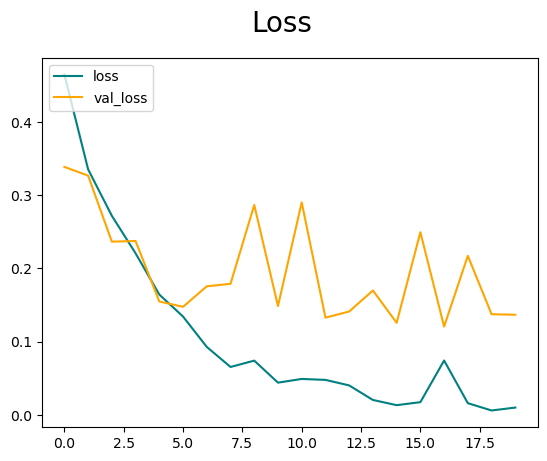

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()